# Contents
## Introduction and System Setup
- What is Natural Language Processing
    - Unique Challenges in NLP
    - Areas it is used (Spam Filters, Sentiment Analysis, Intent Detection in Digital Assistants)
    - What Problem we are going to Solve (Fake Review Detection)
- Google Colab and GPU Setup
- Installing required Libraries

## Visualizing Data
- Visualize proportion of good vs fake reviews
- Visualize which words are common in good, and fake reviews

## NLP Data Preparation
- Reading Data
- Tokenization
- Lemmatization/Stemming
- Making Bi-Gram and Tri-Grams
- Creating a BOW Representation
- Creating a Tf-Idf Representation

## Making an NLP Classification Model
- Using BOW Representation for Modelling
- Using Tf-Idf Representation for modelling

## Improving by using Word Embeddings
- Word2Vec
- Clustering by PCA in 2D, visualizing if Words in Fake vs Good Reviews are clustered separately
- Using Word2Vec based word embeddings for Modelling

## Improving by Document Embeddings from Word Embeddings
- Doc2Vec
    - Creating Representation using Word2Vec and tf-idf
- Clustering similar to Word2Vec to see if Fake and Good Reviews are separated.
- Using KNN model
- Using a Neural network model

## Other Possible Improvements
- Improving Performace by using LSTM
    - We are only taking the words into account but not their sequence.
- Improving Performance by Transfer Learning
    - We train on other fake review datasets and then use the Neural Networks weights for this Challenge
- Using WordNet for improvement

# References

- https://www.kaggle.com/uciml/sms-spam-collection-dataset
- https://github.com/annaorosz/youtube_spam
- https://www.kaggle.com/benvozza/spam-classification
- https://www.quora.com/What-are-some-good-email-based-data-sets-for-testing-spam-classification-algorithms

In [ ]:
%lsmagic

In [ ]:
%magic

In [ ]:
import pandas as pd
import numpy as np
from IPython.core.display import display
display(pd.DataFrame({"a":[1,2,3],"b":[2,3,4]}))

In [1]:
%autosave 0

Autosave disabled


In [14]:
from collections import Counter
import itertools
import numpy as np # linear algebra
import pandas as pd
def get_pairwise_co_occurence(array_of_arrays,items_taken_together=2):
    counter = Counter()
    for v in array_of_arrays:
        permuted_values = list(itertools.combinations(v, items_taken_together))
        counter.update(permuted_values)
    # The key in the dict being a list cannot be possible unless it's converted to a string.
    co_oc = pd.DataFrame(np.array([[key,value] for key,value in counter.items()]),columns=['items_taken_together','frequency'])
    co_oc['frequency'] = co_oc['frequency'].astype(int)
    co_oc = co_oc[co_oc['frequency']>0]
    co_oc = co_oc.sort_values(['frequency'], ascending=False)
    return co_oc

In [16]:
df = get_pairwise_co_occurence([[1,2,3],[1,3,4],[1,4,7],[4,7,3]])

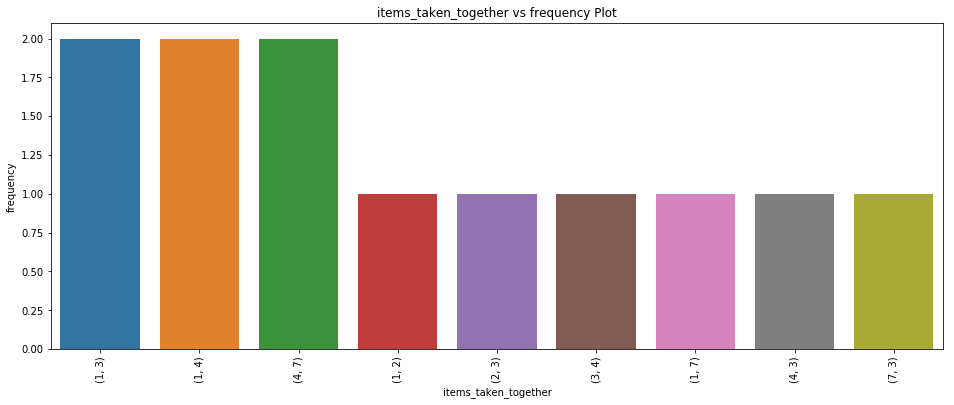

In [19]:
import matplotlib as mplt
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.ticker as ticker
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
def sorted_barplot(df,x,y,limit=50,ascending=True,figsize=(16, 6),logy=False):
    plt.figure(figsize=figsize)
    df = df.sort_values(by=[y], ascending=ascending).reset_index(drop=True)
    tf = df.head(50)[[x,y]]
    ax = sns.barplot(tf[x], tf[y])
    plt.title("%s vs %s Plot"%(x,y))
    plt.xticks(rotation='vertical')
    plt.show()
    
sorted_barplot(df,x='items_taken_together',y='frequency',ascending=False)

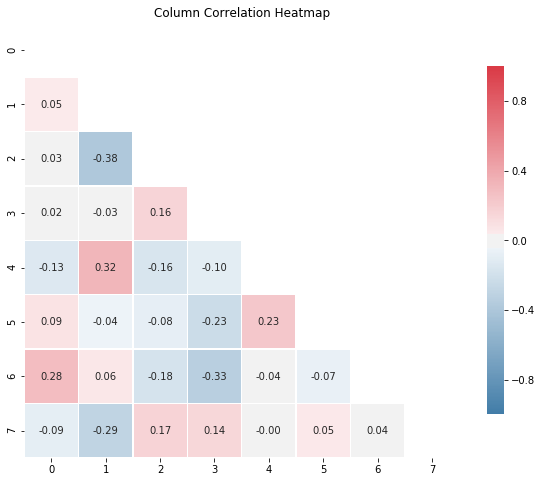

,0,1,2,3,4,5,6,7
0,1.000000,0.046056,0.027424,0.020456,-0.129405,0.085131,0.284875,-0.087986
1,0.046056,1.000000,-0.383746,-0.031528,0.323886,-0.040402,0.057197,-0.291571
2,0.027424,-0.383746,1.000000,0.162720,-0.156870,-0.082283,-0.177648,0.169560
3,0.020456,-0.031528,0.162720,1.000000,-0.095596,-0.230777,-0.331939,0.144145
4,-0.129405,0.323886,-0.156870,-0.095596,1.000000,0.232104,-0.035574,-0.003980
5,0.085131,-0.040402,-0.082283,-0.230777,0.232104,1.000000,-0.068860,0.047080
6,0.284875,0.057197,-0.177648,-0.331939,-0.035574,-0.068860,1.000000,0.036484
7,-0.087986,-0.291571,0.169560,0.144145,-0.003980,0.047080,0.036484,1.000000


In [47]:
def plot_correlation_heatmap(df,threshold=0,figsize=(10,8)):
    corr = df.corr()
    corr = corr.where(np.abs(corr) > threshold, 0)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(240, 10, as_cmap=True)

    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0,vmin=-1.0,cbar_kws={"shrink": .8}, center=0,
                square=True, linewidths=.5, annot=True,fmt='.2f')
    plt.title("Column Correlation Heatmap")
    plt.show()
    return corr
    
    
df = pd.DataFrame(np.random.rand(50,8))

plot_correlation_heatmap(df)

In [51]:
def mean_absolute_percentage_error(y_true, y_pred, epsilon=1e-4):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    diff = np.abs((y_true - y_pred) / np.clip(np.abs(y_true),
                                              epsilon,
                                            None))
    return 100. * np.mean(diff)

mean_absolute_percentage_error([1,2,3],[1.1,2,3])

3.333333333333336